Conor Curry. MATH1080 HW5

# Let's check out how well our numerical methods work with a conserved quantity of the pedulum equation!

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
eps = np.finfo(float).eps
tiny = 100*eps

 ## First we'll define some functions for RK4 and RK2

In [2]:
'''
@param x: Initial values for the IVP
@param fx: System of equations in order of decreasing (derivative) order
           This should be the same shape as @param x.
@param hs: Step size. (Note, since this is only a single step calculation,
                       adaptive step calculation doesn't happen in here)
@return: new values, same shape as x 
         The return value can be used for next iteration, as a new IVP
'''
def RK4(x, fx, h, debug=False):
    n = len(fx)
    x = x.copy()
    k1, k2, k3, k4, xk = [], [], [], [], []
    
    k1 = [fx[i](x)*h for i in range(n)]
    
    xk = [x[i] + k1[i]/2 for i in range(n)]
    if debug: print("XK1: {}".format(xk))    
    k2 = [fx[i](xk)*h for i in range(n)] 
    
    xk = [x[i] + k2[i]/2 for i in range(n)]
    if debug: print("XK2: {}".format(xk))        
    k3 = [fx[i](xk)*h for i in range(n)]
    
    xk = [xk[i] + k3[i] for i in range(n)]
    if debug: print("XK3: {}".format(xk))        
    k4 = [fx[i](xk)*h for i in range(n)]
    
    x = [x[i] + (k1[i] + 2*(k2[i] + k3[i]) + k4[i])/6 for i in range(n)]
    if debug: print("X: {}\n".format(x))
    return x

In [3]:
#AKA Midpoint Method
def RK2(x, fx, h, debug=False):
    n = len(fx)
    x = x.copy()
    k1, k2, xk = [], [], []
    
    k1 = [fx[i](x)*h for i in range(n)]    
    xk = [x[i] + k1[i]/2 for i in range(n)]
    if debug: print("XK1: {}".format(xk))
    k2 = [fx[i](xk)*h for i in range(n)]
    
    x = [x[i] + k2[i] for i in range(n)]
    return x
    

## Setting up the experiment...

In [4]:
x = [2, 1, 0]                  #[θ', θ, t]
fx = [lambda x: -np.sin(x[1]),
      lambda x: x[0],
      lambda x: 1]             #[θ'', θ', t'==1]

In [5]:
def pendulum(solver, x, fx, numsteps, stepsize, debug=False):
    res = [x.copy()]
    for i in range(numsteps):
        res.append(solver(res[-1], fx, stepsize))
    return res

In [6]:
#Experiment always starts at t=0 due to IVP information.
def run_exper(steps, solver, t_end=5, debug=False):
    stepsize = t_end/steps
    out = "t={3:6.3f}\tθ(t)={2:6.3f}\tθ'(t)={1:6.3f}\tθ''(t)={0:6.3f}"
    ts, ys, vs = [], [], []
    conserved_true = [2 - np.cos(1)]
    conserved_actual = []
    for e in pendulum(solver, x, fx, steps, stepsize, debug=debug):
        ts.append(e[2])
        ys.append(e[1])
        vs.append(e[0])
        if debug: print(out.format(-np.sin(e[1]), *e))
        conserved_actual.append((e[0]**2)/2 - np.cos(e[1]))
          
    fig, axarr = plt.subplots(2)
    axarr[0].plot(ys,vs)
    #We gotta fix the length of conserved_true
    conserved_true *= len(conserved_actual)
    axarr[1].plot(ts, conserved_true, ts, conserved_actual)
    print("Final Deviation from Conservation for h={:5.5f}: {:12.10f}".format(
            stepsize, conserved_true[-1] - conserved_actual[-1]))

## Let's run with RK2...

Final Deviation from Conservation for h=0.50000: -0.0920798157
Final Deviation from Conservation for h=0.05000: 0.0002242213
Final Deviation from Conservation for h=0.00500: 0.0000034744
Final Deviation from Conservation for h=0.00050: 0.0000000360


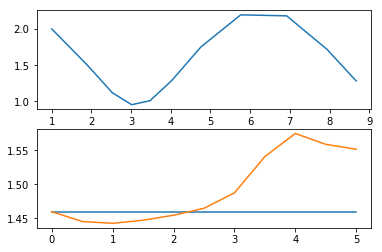

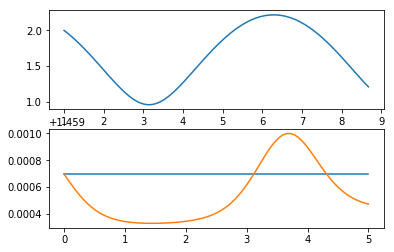

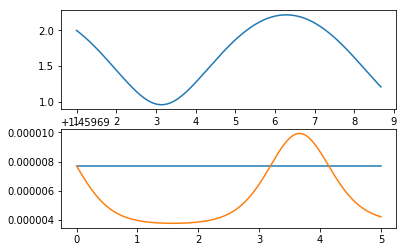

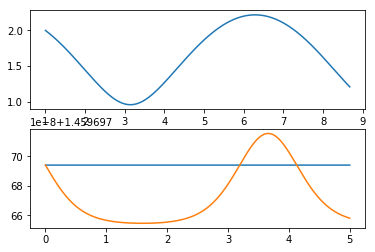

In [7]:
run_exper(10,    RK2)
run_exper(100,   RK2)
run_exper(1000,  RK2)
run_exper(10000, RK2)

## Allright, the error in the conserved quantity is definitely decreasing with smaller step sizes!

## Let's see if the same holds for our RK4 implementation.

Final Deviation from Conservation for h=0.50000: 0.1146286733
Final Deviation from Conservation for h=0.05000: 0.0180889035
Final Deviation from Conservation for h=0.00500: 0.0018566014
Final Deviation from Conservation for h=0.00050: 0.0001861126


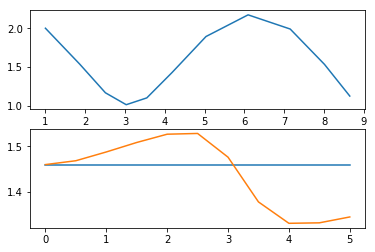

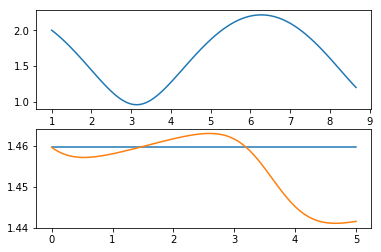

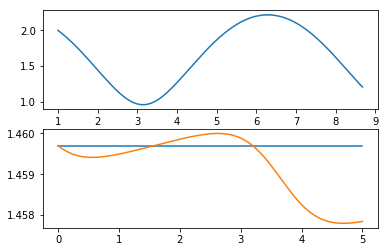

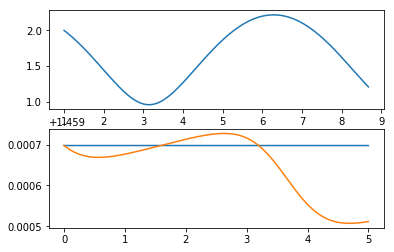

In [8]:
run_exper(10,    RK4)
run_exper(100,   RK4)
run_exper(1000,  RK4)
run_exper(10000, RK4)

## Yep! Now let's move on to some other code.

# Tridiagonal Gaussian Elimination:

### Let's setup the values we'll use. Random value in a determined form!

In [9]:
from random import randrange as rand

N = 10
tridiag = [[rand(1,10) if i-2<j<i+2 else 0 for j in range(N)] for i in range(N)]
d = [rand(1,10) for i in range(N)]

tridiag, d

([[7, 7, 0, 0, 0, 0, 0, 0, 0, 0],
  [9, 6, 9, 0, 0, 0, 0, 0, 0, 0],
  [0, 3, 5, 2, 0, 0, 0, 0, 0, 0],
  [0, 0, 9, 2, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 3, 9, 6, 0, 0, 0, 0],
  [0, 0, 0, 0, 8, 4, 7, 0, 0, 0],
  [0, 0, 0, 0, 0, 3, 7, 9, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 6, 4, 0],
  [0, 0, 0, 0, 0, 0, 0, 6, 3, 7],
  [0, 0, 0, 0, 0, 0, 0, 0, 9, 7]],
 [3, 6, 9, 7, 2, 3, 4, 4, 6, 3])

### On second thought, let's pull those diagonals out...

In [10]:
a = [tridiag[i][i-1] if i>0 else 0 for i in range(N)]
b = [tridiag[i][i] for i in range(N)]
c = [tridiag[i][i+1] if i<N-1 else 0 for i in range(N)]
a, b, c

([0, 9, 3, 9, 3, 8, 3, 1, 6, 9],
 [7, 6, 5, 2, 9, 4, 7, 6, 3, 7],
 [7, 9, 2, 1, 6, 7, 9, 4, 7, 0])

## We now calculate the modified coefficients

In [11]:
modif_c = [c[0]/b[0]]
for i in range(1,N):
    modif_c.append(c[i] / (b[i] - a[i]*modif_c[i-1]))
modif_c

[1.0,
 -3.0,
 0.14285714285714285,
 1.3999999999999997,
 1.2499999999999998,
 -1.166666666666667,
 0.8571428571428571,
 0.7777777777777777,
 -4.200000000000001,
 0.0]

In [12]:
#modif_d = [d[i]/b[i] if i==1 \
#           else (d[i] - a[i]*modif_d[i-1])/(b[i] - a[i]*modif_c[i-1]) for i in range(N)]
modif_d = [d[0]/b[0]]
for i in range(1,N):
    modif_d.append((d[i] - a[i]*modif_d[i-1]) / (b[i] - a[i]*modif_c[i-1]))
modif_d

[0.42857142857142855,
 -0.7142857142857144,
 0.7959183673469388,
 -0.2285714285714288,
 0.5595238095238095,
 0.24603174603174613,
 0.31065759637188206,
 0.7173721340388006,
 -1.017460317460318,
 0.2713647959183674]

### Those are probably none too fun looking. Let's keep going. 
### It's time for back substitution!

In [13]:
#Got to have an array we are actually solving into. Let's initialize that.
x = np.zeros(N)
x[-1] = modif_d[-1]
for i in range(N-2, -1, -1):
    x[i] = modif_d[i] - modif_c[i]*x[i+1]

## We're going to want to check this against what numpy computes

In [14]:
np_solution = np.linalg.solve(tridiag, d)
diff = [np_solution[i] - x[i] for i in range(N)]

### Moment of truth...

In [15]:
print('{:20}{:20}{:20}'.format('My Solution', 'Numpy Solution', 'Diff'))
for i in range(N):
    print('{: 2.5f}{: 20.5f}{: 20.5f}'.format(x[i],
                                              float(np_solution[i]), 
                                              diff[i]))

My Solution         Numpy Solution      Diff                
-1.68893            -1.68893             0.00000
 2.11750             2.11750            -0.00000
 0.94393             0.94393             0.00000
-1.03607            -1.03607             0.00000
 0.57678             0.57678            -0.00000
-0.01381            -0.01381             0.00000
-0.22272            -0.22272            -0.00000
 0.62227             0.62227            -0.00000
 0.12227             0.12227             0.00000
 0.27136             0.27136            -0.00000


## Woo!

# Now just a PLU Decomposition:

Note. This doesn't work.

In [16]:
M = np.random.randint(-30, 30, (9,9))
M[5,5] = 0
M

array([[  2, -12, -21,   7, -22,  -5, -21, -26, -10],
       [-27, -18, -26, -17,  12,   2,  25,  26,  15],
       [ 22, -10,  16,  19,  -1,  -1,  26,  10,   5],
       [ -4,  -5,   3,  12, -21,  -8, -26,  -8,  25],
       [ 18,  24,  15,  18,   3, -17,   0, -22, -29],
       [-10,   0,  -9,  -7,  14,   0,   2, -13,  -4],
       [ 18, -29, -18,   4,   6, -11, -19, -15,  21],
       [ 14,  23,  15, -29,  22,   7, -30,  15,  13],
       [  8,   9, -22,  -4, -29,   1, -27,  -4,  -4]])

In [17]:
def pivot(i, M):
    N = M.shape[0]
    row_maxes = np.zeros(N)
    for j in range(i, N):
        row_maxes[j] = abs(M[j,j])
        for k in range(i+1, N):
            if row_maxes[j] < abs(M[j,k]):
                d[j] = abs(M[j,k])
    print(row_maxes)
    
        
    pivotrow = i
    pivot = abs(M[i,i])/row_maxes[i]
    for j in range(i+1, N):
        if pivot < abs(M[j,i])/row_maxes[j]:
            pivot = abs(M[j,i])/row_maxes[j]
            pivotrow = j
    return pivotrow
pivot(0, M)
    

[  2.  18.  16.  12.   3.   0.  19.  15.   4.]


/usr/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in true_divide
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in true_divide


5

In [18]:
#@param: M, a square matrix
#@returns: Three matrices
#          P: A permutation matrix - keeps track of pivoting swaps we've done
#          L: A lower triangular matrix
#          U: An upper triangular matrix
def PLU(M):
    M = np.array(M)
    P, L, U = np.zeros(M.shape), np.zeros(M.shape), np.zeros(M.shape)
    #Unfinished.